Importing Required Libraries

In [ ]:
import os
import PIL
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True) 

Mounted at /content/gdrive


In [ ]:
p="/content/gdrive/MyDrive/Agriculture Vision Dataset/New Augmented"
os.chdir(p)
class_count = len(os.listdir(p))
print(class_count)

4


In [ ]:
batch_size=32
image_size=(512,512)

Splitting dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Agriculture Vision Dataset/New Augmented",
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/gdrive/MyDrive/Agriculture Vision Dataset/New Augmented" ,
   validation_split=0.1,
   subset="validation",
   seed=123,
   image_size=image_size,
   batch_size=32
) 

Found 8000 files belonging to 4 classes.
Using 7200 files for training.
Found 8000 files belonging to 4 classes.
Using 800 files for validation.


Loading InceptionV3 Model

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (512, 512, 3), include_top = False, weights = None)
base_model1 = InceptionV3(input_shape = (512, 512, 3), include_top = False, weights = None)

Training last 12 layers

In [ ]:
for layer in base_model.layers[0:-12]:
    layer.trainable = False

Modifying Architecture and Compiling model

In [ ]:
flat = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(flat)
output = layers.Dense(4, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, output)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model Training 

Number of epochs = 10

In [ ]:
reshist = model.fit(train_ds, validation_data = val_ds, epochs = 10)

Epoch 1/10
20/20 [==============================] - 383s 15s/step - loss: 120.7931 - accuracy: 0.2487 - val_loss: 24.7377 - val_accuracy: 0.2438
Epoch 2/10
20/20 [==============================] - 141s 7s/step - loss: 14.5742 - accuracy: 0.3036 - val_loss: 9.3102 - val_accuracy: 0.2550
Epoch 3/10
20/20 [==============================] - 140s 7s/step - loss: 6.9145 - accuracy: 0.3434 - val_loss: 7.7323 - val_accuracy: 0.2362
Epoch 4/10
20/20 [==============================] - 139s 7s/step - loss: 4.2249 - accuracy: 0.3695 - val_loss: 1.9061 - val_accuracy: 0.3300
Epoch 5/10
20/20 [==============================] - 139s 7s/step - loss: 3.6325 - accuracy: 0.3837 - val_loss: 3.2939 - val_accuracy: 0.2587
Epoch 6/10
20/20 [==============================] - 142s 7s/step - loss: 3.9943 - accuracy: 0.3842 - val_loss: 2.4433 - val_accuracy: 0.2663
Epoch 7/10
20/20 [==============================] - 139s 7s/step - loss: 3.8975 - accuracy: 0.4064 - val_loss: 2.7053 - val_accuracy: 0.3088
Epoch 8/

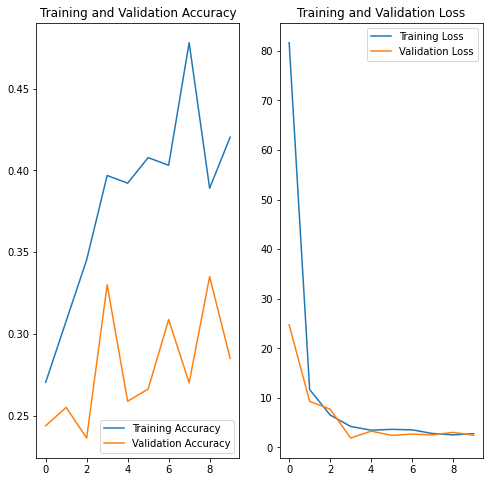

In [ ]:
import matplotlib.pyplot as plt
acc = reshist.history['accuracy']
val_acc = reshist.history['val_accuracy']

loss = reshist.history['loss']
val_loss = reshist.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Number of epochs = 8

In [ ]:
reshist1 = model.fit(train_ds, validation_data = val_ds, epochs = 8)


Epoch 1/8
225/225 [==============================] - 230s 1s/step - loss: 1.9874 - accuracy: 0.4803 - val_loss: 1.6710 - val_accuracy: 0.3625
Epoch 2/8
225/225 [==============================] - 134s 592ms/step - loss: 1.4806 - accuracy: 0.5232 - val_loss: 2.1607 - val_accuracy: 0.4350
Epoch 3/8
225/225 [==============================] - 135s 598ms/step - loss: 1.1684 - accuracy: 0.5603 - val_loss: 2.1478 - val_accuracy: 0.4888
Epoch 4/8
225/225 [==============================] - 136s 602ms/step - loss: 1.2181 - accuracy: 0.5665 - val_loss: 1.1218 - val_accuracy: 0.5688
Epoch 5/8
225/225 [==============================] - 136s 602ms/step - loss: 1.0096 - accuracy: 0.5943 - val_loss: 1.2111 - val_accuracy: 0.5075
Epoch 6/8
225/225 [==============================] - 137s 605ms/step - loss: 0.9749 - accuracy: 0.6069 - val_loss: 1.1361 - val_accuracy: 0.5288
Epoch 7/8
225/225 [==============================] - 137s 603ms/step - loss: 0.9421 - accuracy: 0.6200 - val_loss: 1.7657 - val_accur

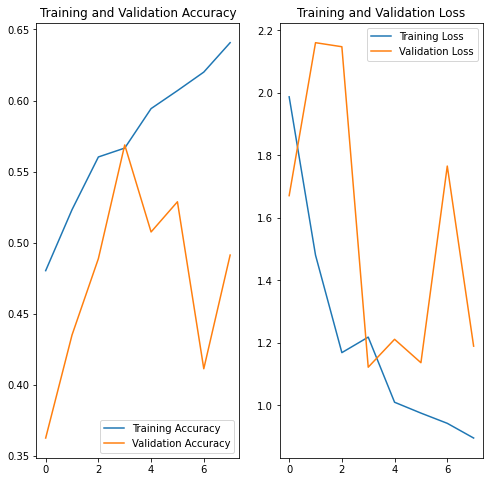

In [ ]:

acc = reshist1.history['accuracy']
val_acc = reshist1.history['val_accuracy']

loss = reshist1.history['loss']
val_loss = reshist1.history['val_loss']

epochs_range = range(8)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Number of epochs = 20

In [ ]:
reshist2 = model.fit(train_ds, validation_data = val_ds, epochs = 20)

Epoch 1/20
225/225 [==============================] - 138s 609ms/step - loss: 0.8905 - accuracy: 0.6449 - val_loss: 1.5420 - val_accuracy: 0.4462
Epoch 2/20
225/225 [==============================] - 138s 609ms/step - loss: 0.8792 - accuracy: 0.6489 - val_loss: 1.1049 - val_accuracy: 0.5337
Epoch 3/20
225/225 [==============================] - 138s 609ms/step - loss: 0.8672 - accuracy: 0.6510 - val_loss: 1.1792 - val_accuracy: 0.5000
Epoch 4/20
225/225 [==============================] - 138s 609ms/step - loss: 0.8802 - accuracy: 0.6453 - val_loss: 1.3215 - val_accuracy: 0.4387
Epoch 5/20
225/225 [==============================] - 138s 610ms/step - loss: 0.8276 - accuracy: 0.6697 - val_loss: 1.4037 - val_accuracy: 0.4750
Epoch 6/20
225/225 [==============================] - 138s 609ms/step - loss: 0.8103 - accuracy: 0.6731 - val_loss: 1.0305 - val_accuracy: 0.5300
Epoch 7/20
225/225 [==============================] - 138s 610ms/step - loss: 0.8257 - accuracy: 0.6665 - val_loss: 1.6480 -

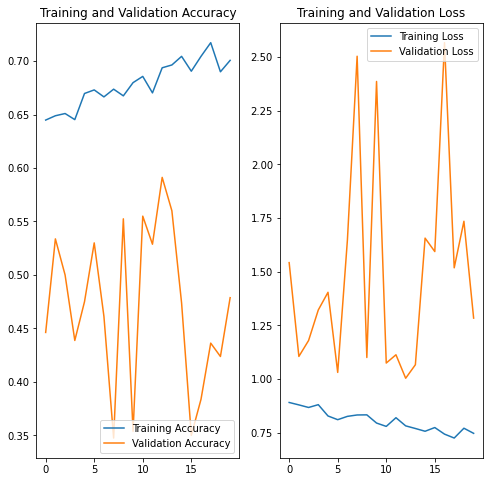

In [ ]:
acc = reshist2.history['accuracy']
val_acc = reshist2.history['val_accuracy']

loss = reshist2.history['loss']
val_loss = reshist2.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()